In [70]:
import sys
import os
sys.path.append(os.path.expanduser('~/workspace/tacotron/'))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap
from PIL import Image
from lib import sigproc as sp

In [71]:
wav_sr = 16000
dftlen = 4096

In [72]:
training_data_dir = '/media/josh/Store/tacotron-data/gran-lj-training'
metadata_filename = os.path.join(training_data_dir, 'test.txt')

cfg = Configuration(16000, 86)
synth = PMLSynthesizer(cfg)
# synth.load(checkpoint_path, hparams, gta=gta, model_name=args.variant)

with open(metadata_filename, encoding='utf-8') as f:
    metadata = [line.strip().split('|') for line in f]
    hours = sum((int(x[2]) for x in metadata)) * hparams.frame_shift_ms / (3600 * 1000)
    print('Loaded metadata for %d examples (%.2f hours)' % (len(metadata), hours))
    
pml_features = [m[3] for m in metadata]
texts = [m[5] for m in metadata]
wav_files = [m[6] for m in metadata]

Loaded metadata for 150 examples (0.27 hours)


In [134]:
FIGSIZE = (10, 6)
SMALL_FIGSIZE = (6, 4)
TARGET_INDEX = 26
texts[TARGET_INDEX]

'Also the Department requests the sum of one hundred thousand dollars to conduct a detailed feasibility study;'

In [94]:
fixed_sentence = 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition'

In [104]:
ref_filename = '/home/josh/tacotron/corrected-lj-training/pml/ljspeech-pml-00001.npy'
pml_feat_ref = np.load(ref_filename)
# pml_feat_gta = np.load('/home/josh/tacotron/tacotron_output/gta/pml-ljspeech-00001.npy')
# pml_feat_natural = np.load('/home/josh/tacotron/tacotron_output/natural/pml-ljspeech-00001.npy')
# pml_feat_eal = np.load('/home/josh/tacotron/tacotron_output/eal/pml-ljspeech-00001.npy')

In [105]:
from tacotron.pml_synthesizer import Configuration, PMLSynthesizer
from lib import sigproc as sp
import tensorflow as tf
from hparams import hparams
from tacotron.alignment_synthesizer import AlignmentSynthesizer

align_synth = AlignmentSynthesizer()

# reset the graph before we do anything
tf.reset_default_graph()
cfg = Configuration(16000, 163)
pml_synth = PMLSynthesizer(cfg)
hparams.parse('sample_rate=16000,frame_length_ms=20,frame_shift_ms=5,pml_dimension=163,spec_type=fwbnd')
pml_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens', gta=True)
pml_feat_gta = pml_synth.synthesize([fixed_sentence], pml_filenames=[ref_filename])[0]
align_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens', cut_lengths=True, gta=True)
gta_align = align_synth.synthesize([fixed_sentence], pml_filenames=[ref_filename])

INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
Constructing model: tacotron_pml_x_locsens
Initialized Tacotron model. Dimensions: 
  Train mode:              False
  GTA mode:                False
  Embedding:               256
  Prenet out:              128
  Encoder out:             256
  Attention out:           256
  Concat attn & out:       512
  Decoder cell out:        256
  Decoder out (5 frames):  815
  Decoder out (1 frame):   163
  Postnet out:             256
  PML out:                 163
Loading checkpoint: /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000


In [106]:
# reset the graph before we do anything
tf.reset_default_graph()
hparams.parse('sample_rate=16000,frame_length_ms=20,frame_shift_ms=5,pml_dimension=163,spec_type=fwbnd')
align_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens',
                 cut_lengths=False, gta=True)
locked_alignments = align_synth.synthesize([fixed_sentence], pml_filenames=[ref_filename])[np.newaxis]

Constructing model: tacotron_pml_x_locsens
Initialized Tacotron model. Dimensions: 
  Train mode:              False
  GTA mode:                False
  Embedding:               256
  Prenet out:              128
  Encoder out:             256
  Attention out:           256
  Concat attn & out:       512
  Decoder cell out:        256
  Decoder out (5 frames):  815
  Decoder out (1 frame):   163
  Postnet out:             256
  PML out:                 163
Loading checkpoint: /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000


In [79]:
locked_alignments.shape

(1, 110, 800)

In [107]:
hparams.parse('sample_rate=16000,frame_length_ms=20,frame_shift_ms=5,pml_dimension=163,spec_type=fwbnd')
pml_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens',
               locked_alignments=locked_alignments)
pml_feat_eal = pml_synth.synthesize([fixed_sentence])[0]
align_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens',
                 locked_alignments=locked_alignments)
eal_align = align_synth.synthesize([fixed_sentence])

INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
Constructing model: tacotron_pml_x_locsens
Initialized Tacotron model. Dimensions: 
  Train mode:              False
  GTA mode:                False
  Embedding:               256
  Prenet out:              128
  Encoder out:             256
  Attention out:           256
  Concat attn & out:       512
  Decoder cell out:        256
  Decoder out (5 frames):  815
  Decoder out (1 frame):   163
  Postnet out:             256
  PML out:                 163
Loading checkpoint: /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000


In [108]:
# reset the graph before we do anything
tf.reset_default_graph()
pml_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens')
pml_feat_natural = pml_synth.synthesize([fixed_sentence])[0]
align_synth.load('/media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000', hparams, model_name='tacotron_pml_x_locsens')
natural_align = align_synth.synthesize([fixed_sentence])

INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
Constructing model: tacotron_pml_x_locsens
Initialized Tacotron model. Dimensions: 
  Train mode:              False
  GTA mode:                False
  Embedding:               256
  Prenet out:              128
  Encoder out:             256
  Attention out:           256
  Concat attn & out:       512
  Decoder cell out:        256
  Decoder out (5 frames):  815
  Decoder out (1 frame):   163
  Postnet out:             256
  PML out:                 163
Loading checkpoint: /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000
INFO:tensorflow:Restoring parameters from /media/josh/Store/remote-logs/163-pmlx-lj-150k/model.ckpt-112000


In [109]:
ref_log_f0 = pml_feat_ref[:, 0]
gta_log_f0 = pml_feat_gta[:, 0]
natural_log_f0 = pml_feat_natural[:gta_log_f0.size, 0]
eal_log_f0 = pml_feat_eal[:gta_log_f0.size, 0]

In [110]:
ref_log_f0.size, gta_log_f0.size, natural_log_f0.size, eal_log_f0.size

(1927, 1980, 1980, 1980)

In [111]:
ref_time_steps = 0.005 * np.arange(ref_log_f0.size)
time_steps = 0.005 * np.arange(gta_log_f0.size)
natural_time_steps = 0.005 * np.arange(natural_log_f0.size)

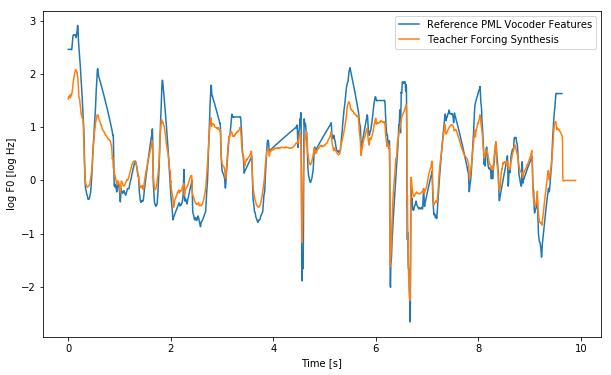

In [151]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
# plt.plot(time_steps, natural_log_f0)
# plt.plot(time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
# plt.xlim(5.5, 6)
plt.savefig('./InvTrajectories/FullGTA.png', dpi=600)
plt.show()

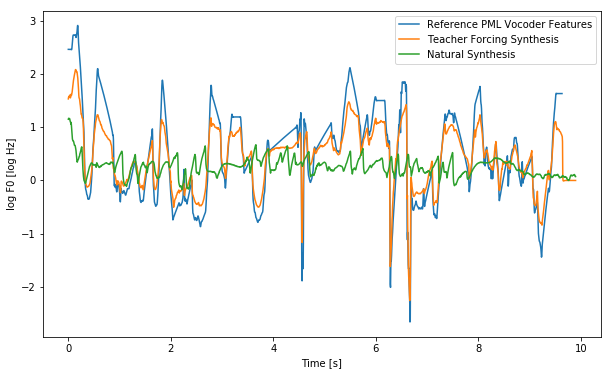

In [152]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
plt.plot(time_steps, natural_log_f0)
# plt.plot(time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
# plt.xlim(5.5, 6)
plt.savefig('./InvTrajectories/FullNatural.png', dpi=600)
plt.show()

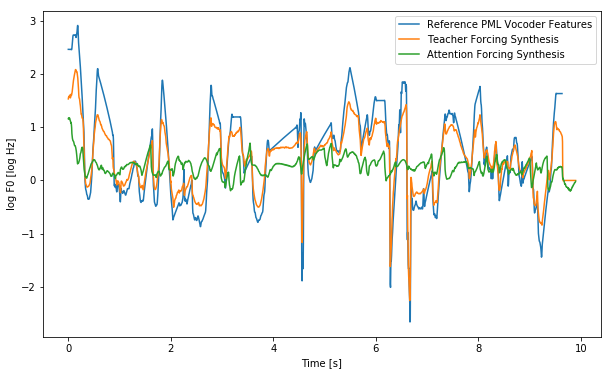

In [153]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
# plt.plot(time_steps, natural_log_f0)
plt.plot(natural_time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Attention Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
# plt.xlim(5.5, 6)
plt.savefig('./InvTrajectories/FullEAL.png', dpi=600)
plt.show()

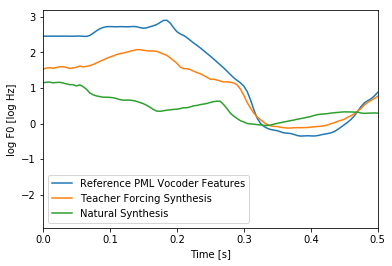

In [154]:
plt.figure(figsize=SMALL_FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
plt.plot(time_steps, natural_log_f0)
# plt.plot(time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
plt.xlim(0.0, 0.5)
plt.savefig('./InvTrajectories/NaturalCloseUpStart.png', dpi=600)
plt.show()

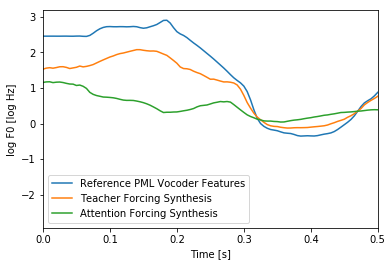

In [155]:
plt.figure(figsize=SMALL_FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
# plt.plot(time_steps, natural_log_f0)
plt.plot(time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Attention Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
plt.xlim(0.0, 0.5)
plt.savefig('./InvTrajectories/EALCloseUpStart.png', dpi=600)
plt.show()

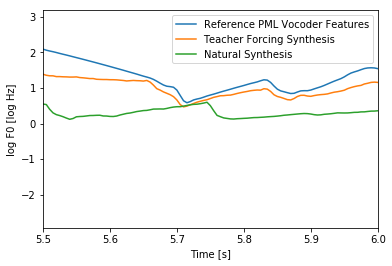

In [156]:
plt.figure(figsize=SMALL_FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
plt.plot(time_steps, natural_log_f0)
# plt.plot(time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
plt.xlim(5.5, 6)
plt.savefig('./InvTrajectories/NaturalCloseUpLate.png', dpi=600)
plt.show()

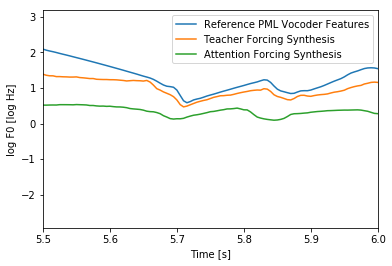

In [157]:
plt.figure(figsize=SMALL_FIGSIZE)
plt.plot(ref_time_steps, ref_log_f0)
plt.plot(time_steps, gta_log_f0)
# plt.plot(time_steps, natural_log_f0)
plt.plot(natural_time_steps, eal_log_f0)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Attention Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
plt.xlim(5.5, 6)
plt.savefig('./InvTrajectories/EALCloseUpLate.png', dpi=600)
plt.show()

In [117]:
ref_norm = np.linalg.norm(pml_feat_ref[:, :], axis=1)
gta_norm = np.linalg.norm(pml_feat_gta[:, :], axis=1)
natural_norm = np.linalg.norm(pml_feat_natural[:gta_norm.size, :], axis=1)
eal_norm = np.linalg.norm(pml_feat_eal[:gta_norm.size, :], axis=1)

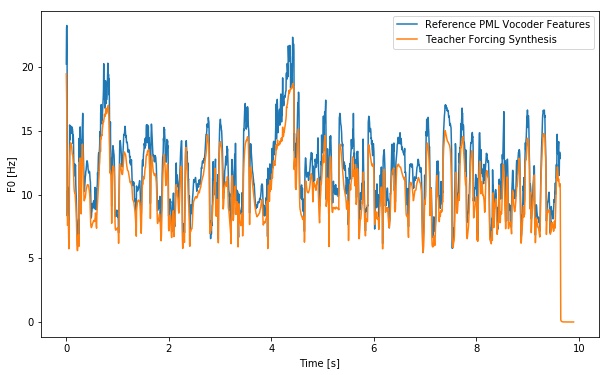

In [148]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
# plt.plot(time_steps, natural_norm)
# plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('log F0 [log Hz]')
# plt.xlim(0, 0.5)
plt.savefig('./InvTrajectories/NormGTA.png', dpi=600)
plt.show()

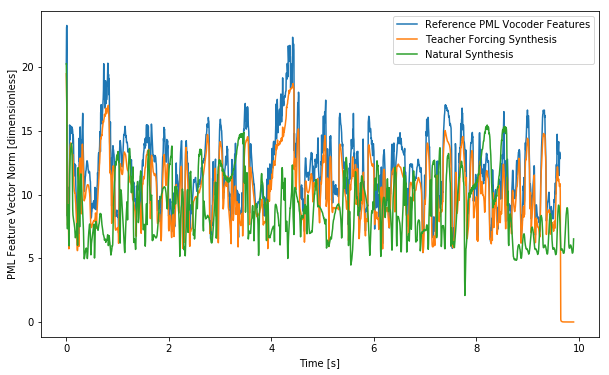

In [159]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
plt.plot(time_steps, natural_norm)
# plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('PML Feature Vector Norm [dimensionless]')
# plt.xlim(0, 0.5)
plt.savefig('./InvTrajectories/NormGTAAndNatural.png', dpi=600)
plt.show()

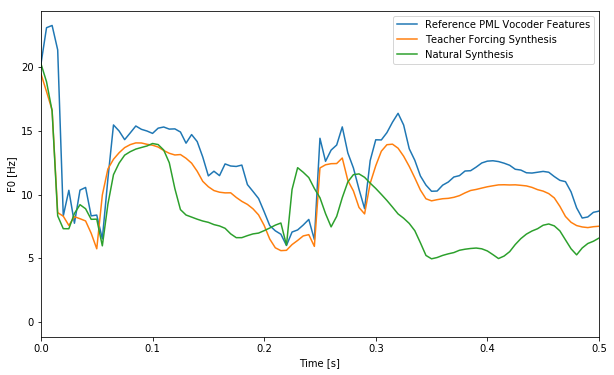

In [118]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
plt.plot(time_steps, natural_norm)
# plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('F0 [Hz]')
plt.xlim(0, 0.5)
plt.show()

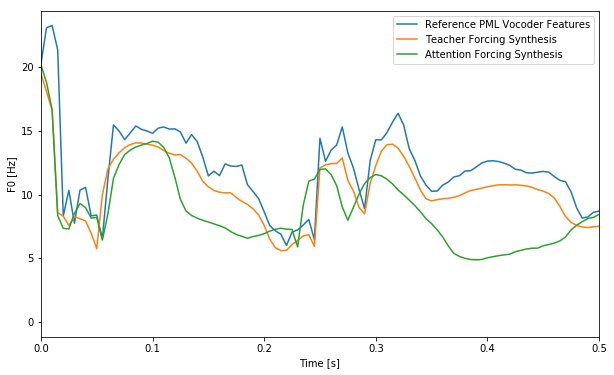

In [119]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
# plt.plot(time_steps, natural_norm)
plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Attention Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('F0 [Hz]')
plt.xlim(0, 0.5)
plt.show()

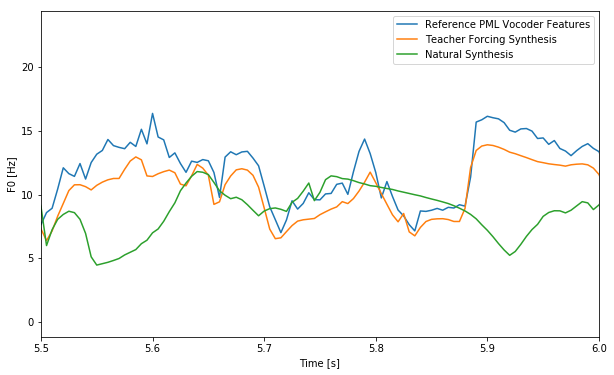

In [120]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
plt.plot(time_steps, natural_norm)
# plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Natural Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('F0 [Hz]')
plt.xlim(5.5, 6)
plt.show()

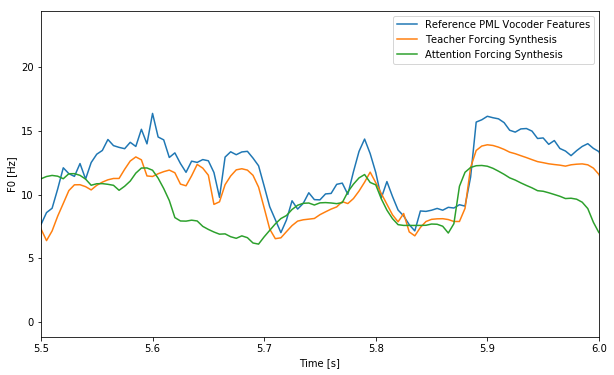

In [121]:
plt.figure(figsize=FIGSIZE)
plt.plot(ref_time_steps, ref_norm)
plt.plot(time_steps, gta_norm)
# plt.plot(time_steps, natural_norm)
plt.plot(time_steps, eal_norm)
plt.legend(['Reference PML Vocoder Features', 'Teacher Forcing Synthesis', 'Attention Forcing Synthesis'])
plt.xlabel('Time [s]')
plt.ylabel('F0 [Hz]')
plt.xlim(5.5, 6)
plt.show()

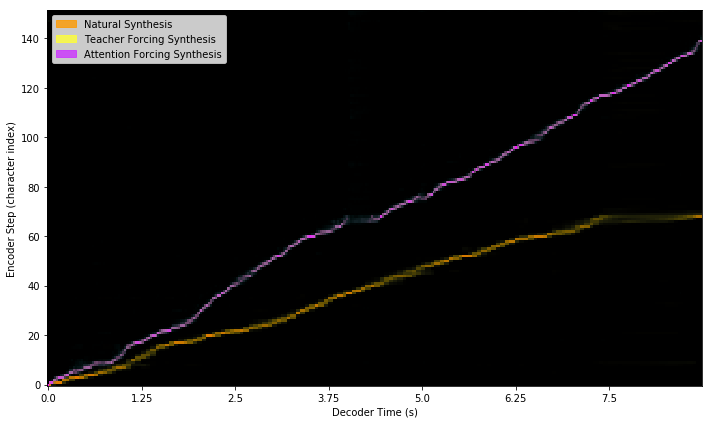

In [142]:
fig, ax = plt.subplots(figsize=FIGSIZE)

natural_patch = show_alignment(natural_align, 'Natural Synthesis', ax, cmap=cm.Wistia, scale_factor=12.5 / 5, cutoff=350)
gta_patch = show_alignment(gta_align, 'Teacher Forcing Synthesis', ax, cmap=cm.hot, cutoff=350)
eal_patch = show_alignment(locked_alignments[0], 'Attention Forcing Synthesis', ax, cmap=cm.cool, cutoff=350)
ax.legend(handles=[natural_patch, gta_patch, eal_patch], loc='upper left')

plt.savefig('./InvTrajectories/EALNaturalAlignments.png', dpi=600)
plt.show()

In [141]:
def show_alignment(alignment, label, ax, cmap=cm.cool, cutoff=220, scale_factor=1, norm=False):
    # normalise the alignment to scale from 0 to 1
    if norm:
        alignment = alignment / np.max(alignment)
    
    # set the background of the axis to black
    ax.set_facecolor('xkcd:black')
    
    cool = cmap(np.arange(cmap.N))
    # Set alpha
    cool[:, -1] = np.linspace(0, 1, cmap.N)
    # Create new colormap
    cool = ListedColormap(cool)
    # generate the image
    im_obj = Image.fromarray(np.uint8(cool(alignment) * 255))
    height, width = alignment.shape
    im_obj = im_obj.resize((round(width * scale_factor), height))
    im_obj = np.array(im_obj)[:, :cutoff]
    
    first_im = ax.imshow(
        im_obj,
        aspect='auto',
        origin='lower',
        interpolation='none')
    
    patch = mpatches.Patch(color=cool(0.8), label=label)
    
    xstep = 50
    outputs_per_step = 5
    frame_shift = 0.005
    plt.xticks(np.arange(0, cutoff, step=xstep),
               np.arange(0, cutoff * frame_shift * outputs_per_step, step=frame_shift * outputs_per_step * xstep))
    plt.xlabel('Decoder Time (s)')
    plt.ylabel('Encoder Step (character index)')
    plt.tight_layout()
    
    return patch

In [ ]:
gta_fwbnd = pml_feat_gta[:, 1:130]
gta_spec = np.exp(sp.fwbnd2linbnd(gta_fwbnd, wav_sr, dftlen))
natural_fwbnd = pml_feat_natural[:, 1:130]
natural_spec = np.exp(sp.fwbnd2linbnd(natural_fwbnd, wav_sr, dftlen))
eal_fwbnd = pml_feat_eal[:, 1:130]
eal_spec = np.exp(sp.fwbnd2linbnd(eal_fwbnd, wav_sr, dftlen))
print(eal_spec.shape)

gta_fwnm = pml_feat_gta[:, 130:]
gta_nm = sp.fwbnd2linbnd(gta_fwbnd, wav_sr, dftlen)
natural_fwnm = pml_feat_natural[:, 130:]
natural_nm = sp.fwbnd2linbnd(natural_fwbnd, wav_sr, dftlen)
eal_fwnm = pml_feat_eal[:, 130:]
eal_nm = sp.fwbnd2linbnd(eal_fwbnd, wav_sr, dftlen)
print(eal_nm.shape)

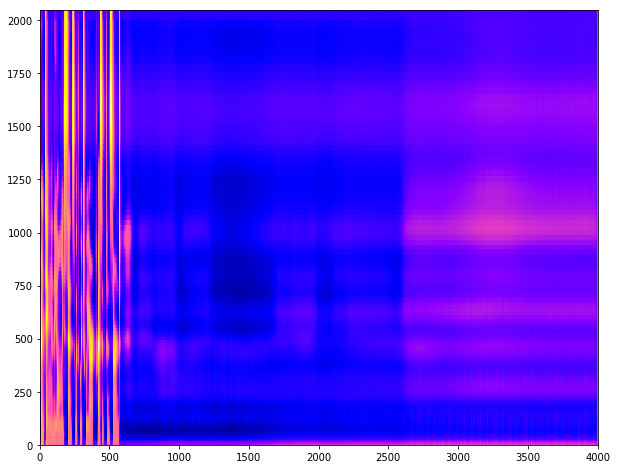

In [22]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(natural_nm.T, cmap='gnuplot2')
plt.show()

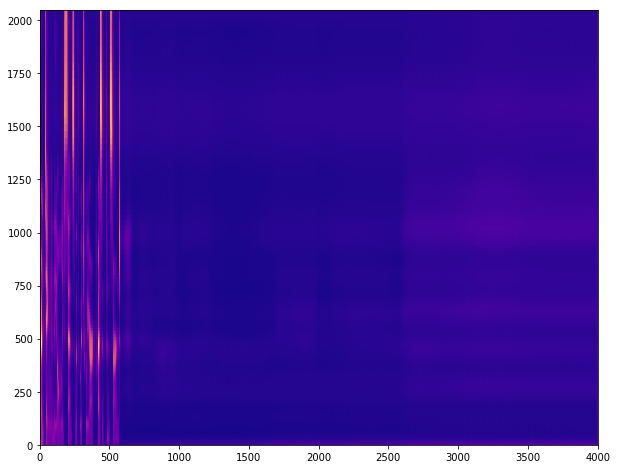

In [15]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(natural_spec.T, cmap='plasma')
plt.show()

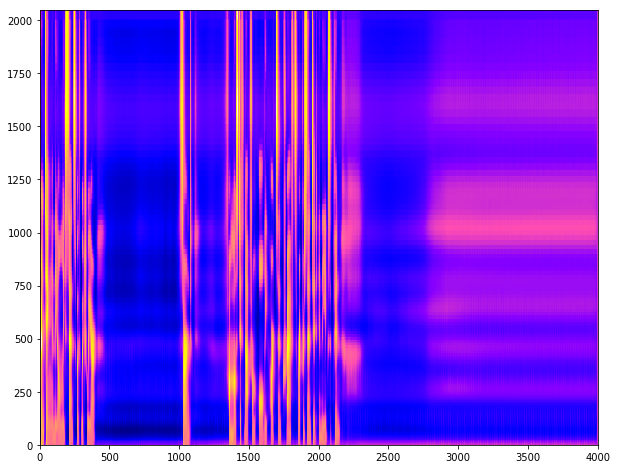

In [23]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(eal_nm.T, cmap='gnuplot2')
plt.show()

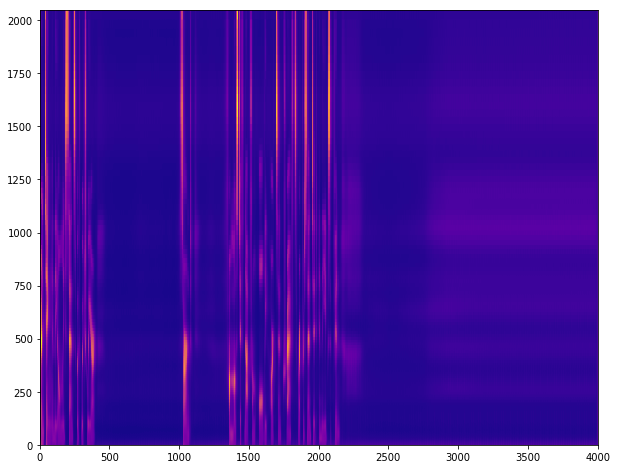

In [17]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(eal_spec.T, cmap='plasma')
plt.show()

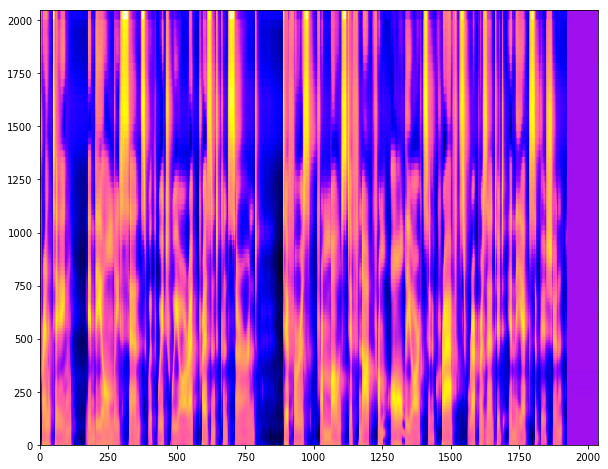

In [24]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(gta_nm.T, cmap='gnuplot2')
plt.show()

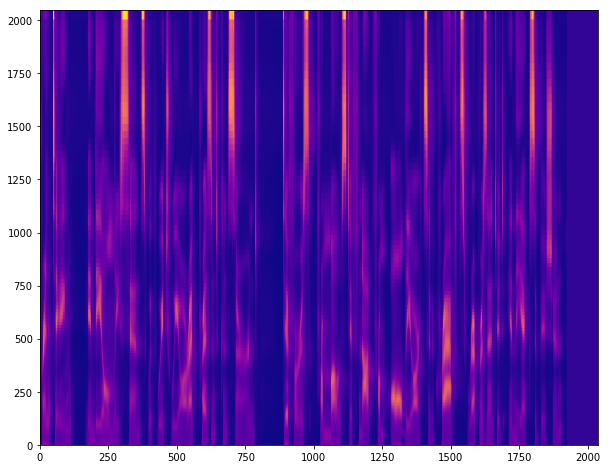

In [18]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(gta_spec.T, cmap='plasma')
plt.show()